In [2]:
import matplotlib.pyplot as plt
import yaml
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import numpy as np

In [3]:
def register_schemes(scheme_path):
    with open(scheme_path) as f:
        schemes = yaml.safe_load(f)

    for scheme in schemes:
        name = scheme['name']
        colors = scheme['colors']
        plt.register_cmap(name=name, cmap=ListedColormap(colors))

In [4]:
# 注册颜色方案
register_schemes('colorschemes/example.yaml')

In [5]:
x=[1,2,3,4,5,6]
y=[1,2,3,4,5,6]

<BarContainer object of 6 artists>

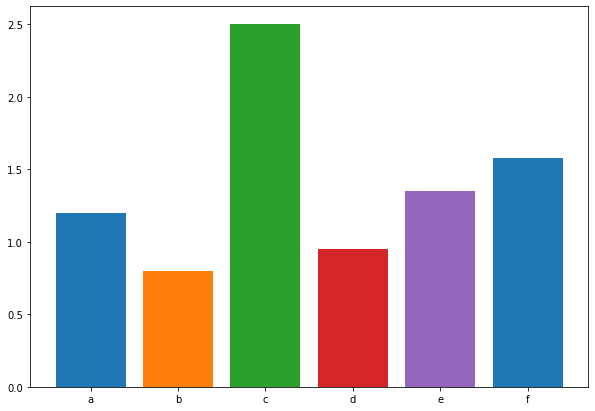

In [6]:
# 以柱状图为例
x = ["a", "b", "c", "d", "e", "f"]
y = [1.2, 0.8, 2.5, 0.95, 1.35, 1.58]


fig, ax = plt.subplots(figsize=(10, 7))
cmap=mpl.cm.get_cmap("Scheme1")
ax.bar(x, y, color=cmap(np.linspace(0, 1, cmap.N)))

In [7]:
import matplotlib.cm as cm

# 获取rainbow颜色映射对象
cmap = cm.get_cmap('Scheme1')

# 获取颜色映射中前5个颜色
colors = cmap(np.linspace(0, 1, 5))

print(colors)  # 输出一个包含5个颜色的数组

[[0.12156863 0.46666667 0.70588235 1.        ]
 [1.         0.49803922 0.05490196 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [0.83921569 0.15294118 0.15686275 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]]


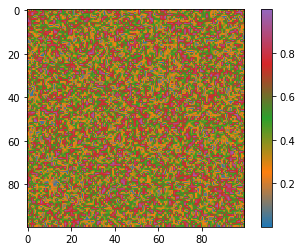

In [8]:
import matplotlib.colors as mcolors

# 定义自定义颜色（红色、绿色和蓝色成分）
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]

# 创建自定义颜色映射
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', cmap(np.linspace(0, 1, 5)))

# 显示颜色映射
plt.imshow(np.random.rand(100, 100), cmap=cmap)
plt.colorbar()

plt.show()

In [97]:
def RGB_to_Hex(rgb):
    color = '#'
    for i in rgb:
        num = int(i)
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color

In [98]:
def draw_cm(colormap):
    fig,axes=plt.subplots()
    axes.imshow([np.arange(len(colormap))],cmap=ListedColormap(colormap))
    axes.set_xticks(np.arange(len(colormap)),colormap)
    axes.set_yticks([])
    axes.grid(False)
    axes.spines["top"].set_visible(False)
    axes.spines["bottom"].set_visible(False)
    axes.spines["left"].set_visible(False)
    axes.spines["right"].set_visible(False)
    axes.tick_params(axis='both',which='both',length=0)


In [99]:
# 定义比较函数，将十六进制数转换为整数进行排序
def rgb_sort(x):
    return int(x[1:], 16)

# 使用自定义比较函数进行排序
# sorted_hex_numbers = sorted(hex_numbers, key=hex_sort)


In [100]:
def colormap(img_path,num_colors=5):
    image = Image.open(img_path)
    small_image = image
    result = small_image.convert('P', palette=Image.Palette.ADAPTIVE, colors=num_colors)   # image with 5 dominating colors
    result = result.convert('RGB')
    main_colors = result.getcolors()
    colormap=[]
    for i in range(len(main_colors)):
        colormap.append(RGB_to_Hex(main_colors[i][1]))
        
    colormap=sorted(colormap,key=rgb_sort)
    colormap.reverse()
    return colormap

In [127]:
# https://blog.csdn.net/a529975125/article/details/102688879
import numpy as np
from PIL import Image
 
 
img_path = '640.png'
image = Image.open(img_path)
 
# 要提取的主要颜色数量
num_colors = 2
 
small_image = image
result = small_image.convert('P', palette=Image.Palette.ADAPTIVE, colors=num_colors)   # image with 5 dominating colors
 
result = result.convert('RGB')
main_colors = result.getcolors()

colormap=[]
for i in range(len(main_colors)):
    colormap.append(RGB_to_Hex(main_colors[i][1]))
    
colormap=sorted(colormap,key=rgb_sort)
colormap.reverse()
colormap

['#595F22', '#1D2C19']

In [129]:
class extract_feature_colors:
    """
    提取图片的特征颜色，包括构建颜色映射和绘制颜色映射。
    """
    def __init__(self,img_path,num_colors=25):
        """
        初始化函数。

        参数：
        - img_path: str 图片路径
        - num_colors: int 需要提取的特征颜色数量，默认值为 25
        """
        self.imgpath=img_path
        self.numcolors=num_colors
    
    def RGB_to_Hex(self,rgb):
        """
        将 RGB 格式的颜色转换为十六进制格式。

        参数：
        - rgb: tuple 包含三个整数的 RGB 颜色元组

        返回值：
        - color: str 十六进制格式的颜色代码
        """
        color = '#'
        for i in rgb:
            num = int(i)
            color += str(hex(num))[-2:].replace('x', '0').upper()
        return color
    
    def draw_cm(self,savefig=True,cmname="colormap.png"):
        """
        绘制颜色映射，并将结果保存到 colormap.png 文件中。

        参数：
        - savefig: bool 是否保存图像，True 表示保存，False 表示不保存，默认值为 True
        - cmname: str 保存的图像名称，仅在 savefig 为 True 时生效，默认值为 "colormap.png"
        """
        fig,axes=plt.subplots(figsize=(1*self.numcolors,2))
        axes.imshow([np.arange(len(self.colormap()))],cmap=ListedColormap(self.colormap()),aspect="auto")
        axes.set_xticks(np.arange(len(self.colormap())),self.colormap())
        axes.set_yticks([])
        axes.grid(False)
        axes.spines["top"].set_visible(False)
        axes.spines["bottom"].set_visible(False)
        axes.spines["left"].set_visible(False)
        axes.spines["right"].set_visible(False)
        axes.tick_params(axis='both',which='both',length=0)
        if savefig== True:
            fig.savefig(cmname,dpi=600)

    def rgb_sort(self,x):
        """
        对颜色排序，将十六进制数转换为整数进行排序。

        参数：
        - x: str 十六进制格式的颜色代码

        返回值：
        - int(x[1:], 16): int 十六进制数转换后的整数
        """
        return int(x[1:], 16)

    def colormap(self):
        """
        构建颜色映射。

        返回值：
        - colormap: list 包含 num_colors 种颜色代码的字符串列表，按顺序排列（从深到浅）
        """
        image = Image.open(self.imgpath)
        small_image = image
        result = small_image.convert('P', palette=Image.Palette.ADAPTIVE, colors=self.numcolors)   # image with 5 dominating colors
        result = result.convert('RGB')
        main_colors = result.getcolors()
        colormap=[]
        for i in range(len(main_colors)):
            colormap.append(self.RGB_to_Hex(main_colors[i][1]))
            
        colormap=sorted(colormap,key=self.rgb_sort)
        colormap.reverse()
        return colormap

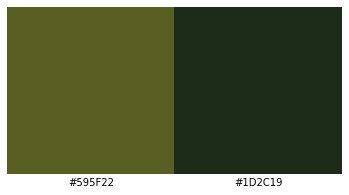

In [131]:
extract_feature_colors("640.png",20).draw_cm()